In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import healpy as hp
import pandas as pd
from rubin_sim.utils import healbin, ra_dec2_hpid, ddf_locations, angular_separation, survey_start_mjd

In [2]:
df = pd.read_csv('baseline_v2.2_10yrs__trojan_5k_obs.txt', delim_whitespace=True, comment='#')

In [3]:
df

,obj_id,time,ra,dec,dradt,ddecdt,phase,solarelon,helio_dist,geo_dist,...,night,observationStartMJD,rotSkyPos,seeingFwhmEff,seeingFwhmGeom,solarElong,visitExposureTime,dmag_color,dmag_trail,dmag_detect
0,0,60292.243872,103.817961,28.337524,-0.125311,0.006929,4.167628,158.751541,4.909357,3.978829,...,74,60292.243872,98.594625,1.005392,0.878432,157.419244,30.0,-0.292449,0.010803,0.007220
1,0,60292.267570,103.814586,28.337685,-0.125359,0.006684,4.162652,158.777705,4.909355,3.978698,...,74,60292.267570,98.594625,1.089752,0.947776,157.442621,30.0,-0.178447,0.009415,0.006211
2,0,60309.219189,101.245993,28.387319,-0.143024,-0.001748,1.087058,174.568202,4.908333,3.928515,...,91,60309.219189,216.911720,1.268373,1.094603,175.449765,30.0,-0.292449,0.009186,0.006046
3,0,60309.242887,101.242142,28.387274,-0.142939,-0.001998,1.085974,174.573532,4.908332,3.928508,...,91,60309.242887,216.911720,0.891141,0.784518,175.454925,30.0,-0.298113,0.016688,0.011694
4,0,60310.290895,101.075533,28.385248,-0.142594,-0.003091,1.066584,174.670757,4.908276,3.928344,...,92,60310.290895,198.154497,1.003527,0.876899,174.393000,30.0,-0.292449,0.013641,0.009338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623722,4999,63826.037170,245.729513,-48.854596,0.044688,0.069866,11.591421,106.308803,4.836245,4.453254,...,3608,63826.037170,265.983000,1.389486,1.194157,106.505632,30.0,-0.292449,0.002821,0.001715
2623723,4999,63826.053587,245.730630,-48.853447,0.044870,0.070069,11.592230,106.295579,4.836241,4.453463,...,3608,63826.053587,263.494368,1.331123,1.146183,107.121219,30.0,-0.292449,0.003068,0.001874
2623724,4999,63826.061807,245.731191,-48.852871,0.044973,0.070166,11.592635,106.288958,4.836240,4.453568,...,3608,63826.061807,265.983000,1.482946,1.270982,106.485047,30.0,-0.298113,0.002528,0.001529
2623725,4999,63836.043495,246.682677,-48.190076,0.076082,0.064708,11.936442,98.318490,4.834223,4.583471,...,3618,63836.043495,270.402469,0.787960,0.699703,99.933525,30.0,0.297755,0.010786,0.007207


In [4]:
nside=128
hpids = ra_dec2_hpid(nside, df['ra'].values, df['dec'].values)

In [5]:
hpdensity = healbin(df['ra'].values, df['dec'].values,
                    df['dec'].values*0+1, nside=nside, reduce_func=np.sum)

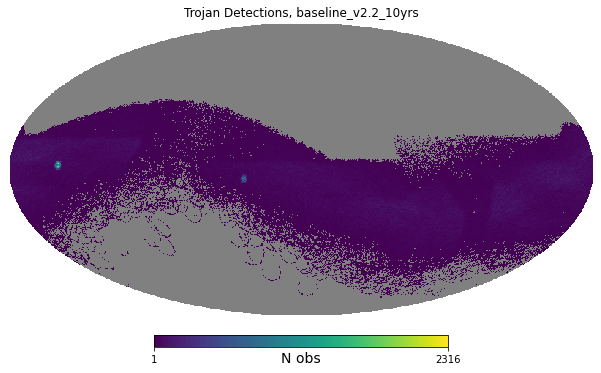

In [6]:
hp.mollview(hpdensity, title='Trojan Detections, baseline_v2.2_10yrs', unit='N obs')

/var/folders/_f/_b0q5pg9521_pmmn3ms3kpj00000gn/T/ipykernel_12173/3802806192.py:1: RuntimeWarning: invalid value encountered in log10
  hp.mollview(np.log10(hpdensity), title='Trojan Detections, baseline_v2.2_10yrs', unit=' log10 N obs')


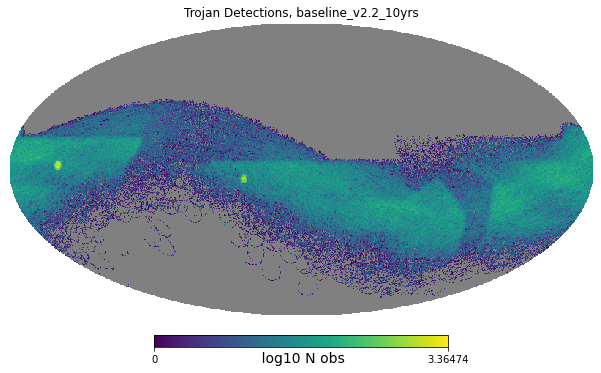

In [7]:
hp.mollview(np.log10(hpdensity), title='Trojan Detections, baseline_v2.2_10yrs', unit=' log10 N obs')

In [8]:
ddfs = ddf_locations()

In [9]:
dist = angular_separation(ddfs['COSMOS'][0], ddfs['COSMOS'][1], df['ra'].values, df['dec'].values)

In [10]:
inside_rad_deg = np.where(dist < 1.8)[0]


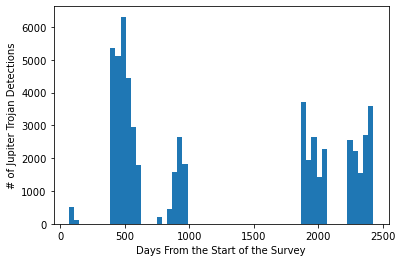

In [13]:
mjds = df['observationStartMJD'].values[inside_rad_deg]
mjds -= survey_start_mjd()
bins = np.arange(mjds.min(), mjds.max(), 40)
_temp = plt.hist(mjds, bins=bins)
plt.xlabel('Days From the Start of the Survey')
plt.ylabel('# of Jupiter Trojan Detections')
#plt.title('baseline_v2.2_10yrs, COSMOS')
plt.savefig('ddf_n_trojans.pdf')

In [12]:
mjd_zero()

NameError: name 'mjd_zero' is not defined